In [48]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 10)

In [49]:
df_train = pd.read_csv('train.csv')
df_train['dataset'] = 'train'
df_test = pd.read_csv('test.csv')
df_test['dataset'] = 'test'
df = pd.concat([df_train,df_test],sort=True,copy=False)

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dataset        891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [51]:
df_train.nunique().sort_values()

dataset          1
Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [52]:
num_features = df_train.select_dtypes(['float64', 'int64']).columns.tolist()
cat_features = df_train.select_dtypes(['object']).columns.tolist()
print('{} numerical features:\n{} \nand {} categorical features:\n{}'.format(len(num_features), num_features, len(cat_features), cat_features))

7 numerical features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
and 6 categorical features:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'dataset']


In [53]:
num_features.remove('PassengerId')
num_features = sorted(num_features)
num_features

['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived']

In [54]:
df_train[num_features].describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


In [55]:
print('{:.2f}% survival rate,{} out of {} survived'.format(
    df_train.Survived.sum()/len(df_train)*100,df_train.Survived.sum(),len(df_train)))

38.38% survival rate,342 out of 891 survived


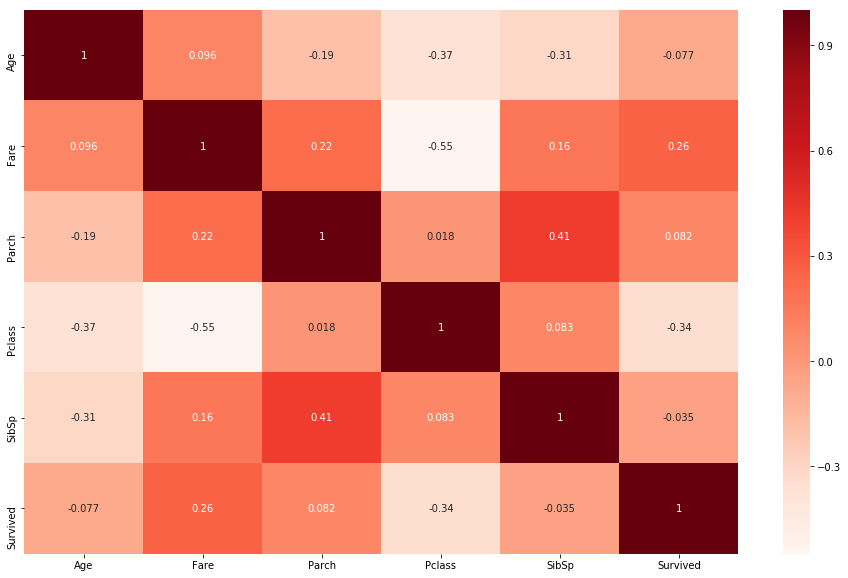

In [56]:
corrplot = sns.heatmap(df_train[num_features].corr(), cmap=plt.cm.Reds, annot=True)

In [57]:
abs(df_train[num_features].corr()['Survived']).sort_values(ascending=False)

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


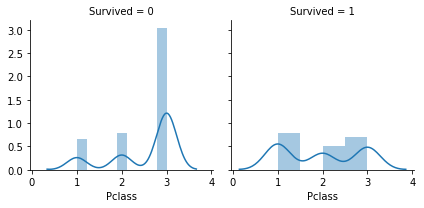

In [58]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Pclass')

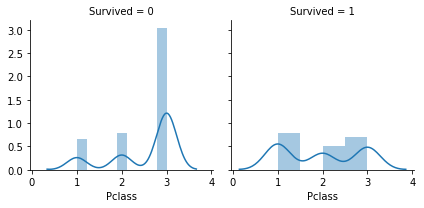

In [59]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Pclass')

In [60]:
df_train.groupby('Pclass').agg(['mean', 'count'])['Survived']

,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


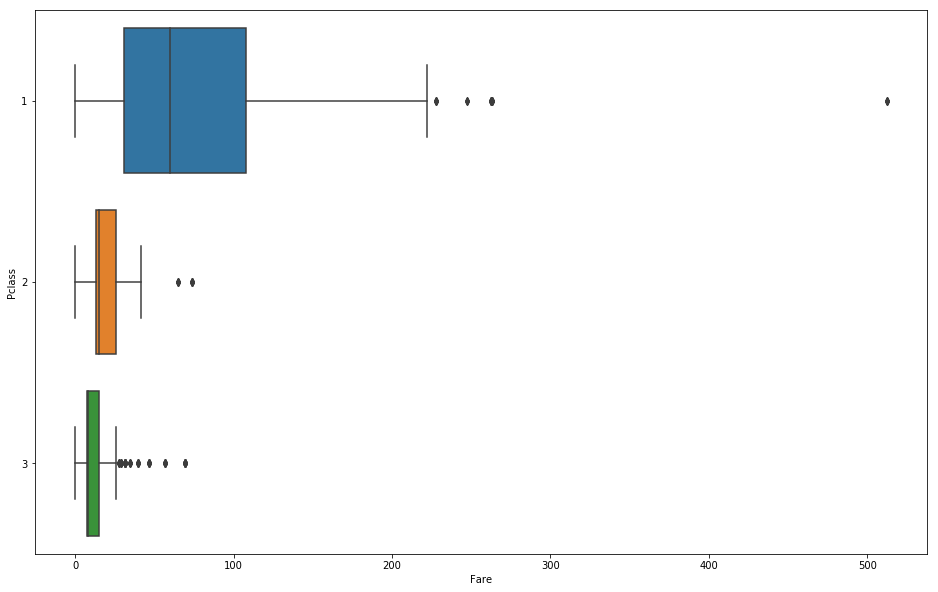

In [61]:
sns.boxplot(data=df, x='Fare', y='Pclass', orient='h')

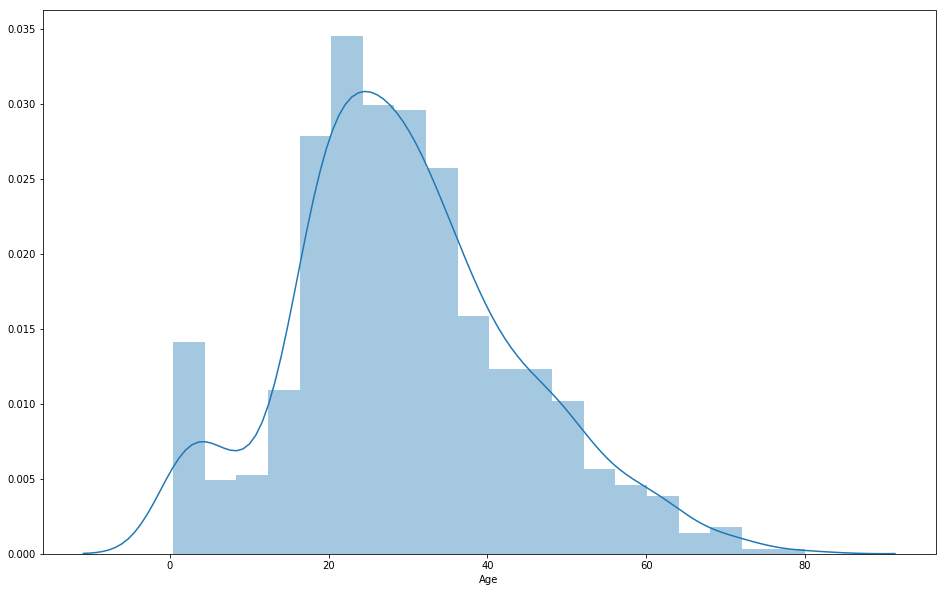

In [62]:
age_plot = sns.distplot(df_train[df_train.Age.notnull()].Age)

In [63]:
df_train.Age.isnull().sum()

177

In [64]:
df['Age'] = df[['Age']].applymap(lambda x: df.Age.mean() if pd.isnull(x) else x)

In [65]:
print(df_train.groupby('SibSp').agg(['mean', 'count'])['Survived'])
print(df_train.groupby('Parch').agg(['mean', 'count'])['Survived'])

           mean  count
SibSp                 
0      0.345395    608
1      0.535885    209
2      0.464286     28
3      0.250000     16
4      0.166667     18
5      0.000000      5
8      0.000000      7
           mean  count
Parch                 
0      0.343658    678
1      0.550847    118
2      0.500000     80
3      0.600000      5
4      0.000000      4
5      0.200000      5
6      0.000000      1


In [66]:
df['Family'] = df.SibSp + df.Parch
print(df[df.dataset == 'train'].groupby('Family').agg(['mean', 'count'])['Survived'])

            mean  count
Family                 
0       0.303538    537
1       0.552795    161
2       0.578431    102
3       0.724138     29
4       0.200000     15
5       0.136364     22
6       0.333333     12
7       0.000000      6
10      0.000000      7


In [67]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

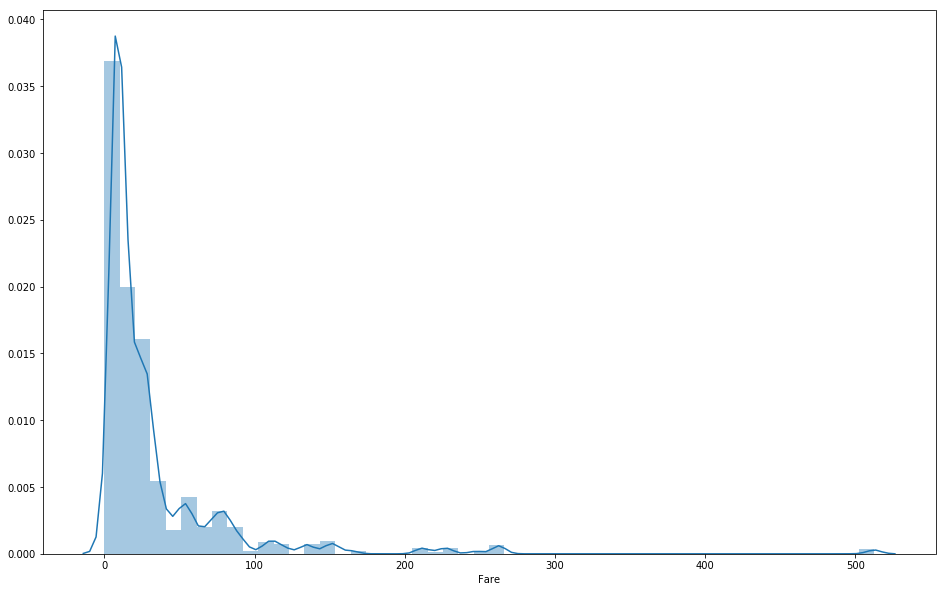

In [68]:
fare_plot = sns.distplot(df_train.Fare)

In [69]:

df_train['Fare_std'] = df_train[['Fare']].apply(lambda x: abs(x-x.mean())/x.std())
df_train[['Fare', 'Fare_std']].sort_values('Fare_std', ascending=False).head(25)

,Fare,Fare_std
258,512.3292,9.661740
737,512.3292,9.661740
679,512.3292,9.661740
438,263.0000,4.644393
341,263.0000,4.644393
88,263.0000,4.644393
27,263.0000,4.644393
311,262.3750,4.631815
742,262.3750,4.631815
299,247.5208,4.332899


In [70]:
df = df[(df.dataset != 'train') | (df.Fare < 200)]

In [71]:
df_train[['Name', 'Ticket']].head(20)

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450
5,"Moran, Mr. James",330877
6,"McCarthy, Mr. Timothy J",17463
7,"Palsson, Master. Gosta Leonard",349909
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",347742
9,"Nasser, Mrs. Nicholas (Adele Achem)",237736


In [72]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


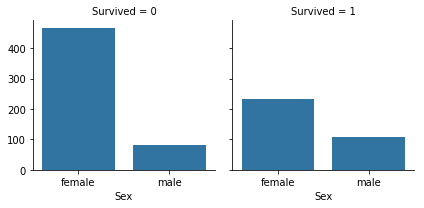

In [73]:
g = sns.FacetGrid(df_train, col='Survived').map(sns.countplot, 'Sex')
df_train.groupby('Sex').agg(['mean', 'count'])['Survived']

In [74]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [75]:
print(df_train.Cabin.isnull().sum())
print(df_train.Cabin.nunique())
df_train.Cabin[df_train.Cabin.notnull()].head(10)

687
147


1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [76]:
df['Cabin'] = df[['Cabin']].applymap(lambda x: 'Z' if pd.isnull(x) else x[0])

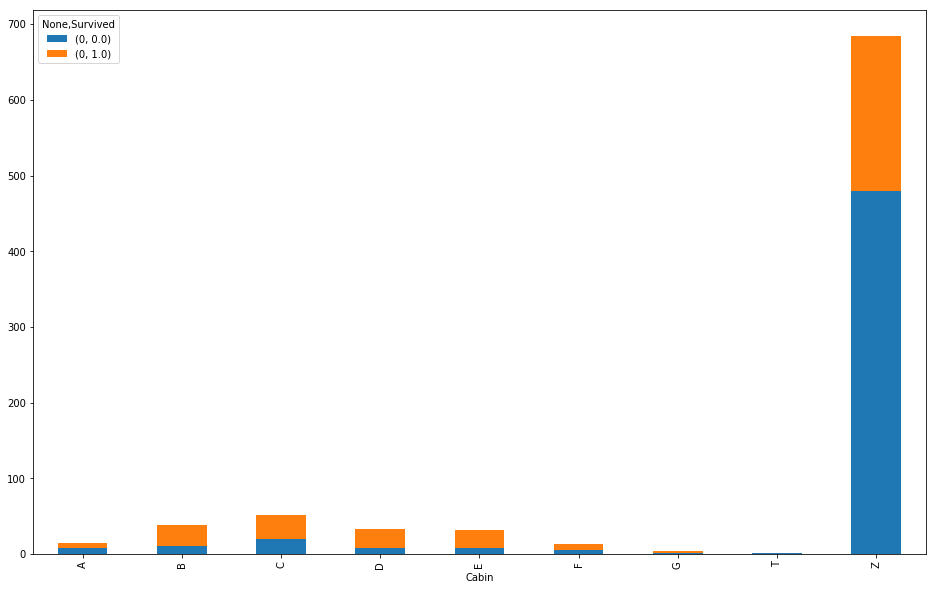

In [77]:
pivoted = df.groupby(['Cabin', 'Survived']).size().reset_index().pivot(index='Cabin', columns='Survived')
stackedplot = pivoted.plot.bar(stacked=True)

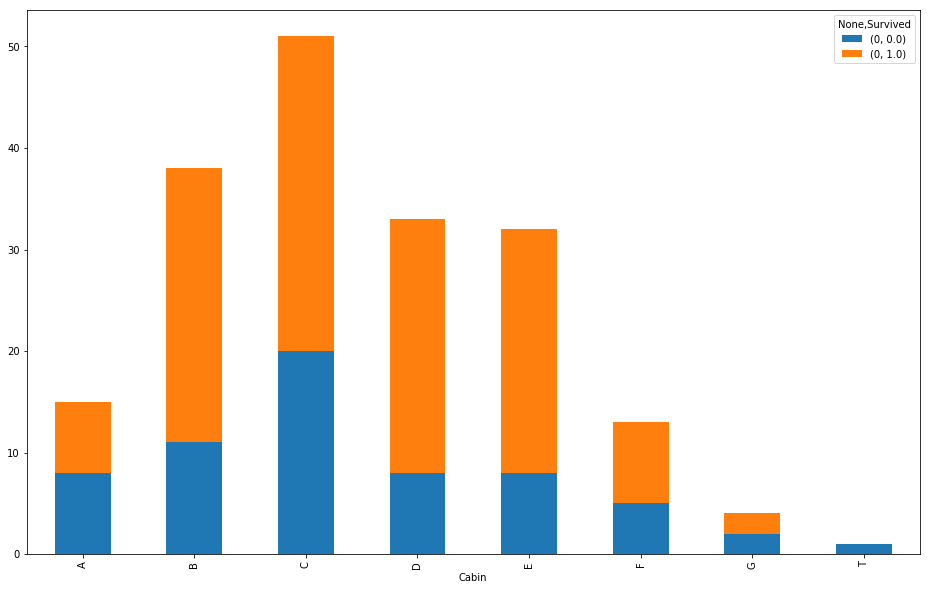

In [78]:
stackedplot_withoutZ = pivoted.drop('Z').plot.bar(stacked=True)

In [79]:
df = pd.get_dummies(df, columns=['Cabin'], prefix='Cabin')

In [80]:
df.head(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,dataset,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z
0,22.000000,S,7.2500,1,3,1,0.0,train,1,0,0,0,0,0,0,0,0,1
1,38.000000,C,71.2833,2,1,0,1.0,train,1,0,0,1,0,0,0,0,0,0
2,26.000000,S,7.9250,3,3,0,1.0,train,0,0,0,0,0,0,0,0,0,1
3,35.000000,S,53.1000,4,1,0,1.0,train,1,0,0,1,0,0,0,0,0,0
4,35.000000,S,8.0500,5,3,1,0.0,train,0,0,0,0,0,0,0,0,0,1
5,29.881138,Q,8.4583,6,3,1,0.0,train,0,0,0,0,0,0,0,0,0,1
6,54.000000,S,51.8625,7,1,1,0.0,train,0,0,0,0,0,1,0,0,0,0
7,2.000000,S,21.0750,8,3,1,0.0,train,4,0,0,0,0,0,0,0,0,1
8,27.000000,S,11.1333,9,3,0,1.0,train,2,0,0,0,0,0,0,0,0,1
9,14.000000,C,30.0708,10,2,0,1.0,train,1,0,0,0,0,0,0,0,0,1


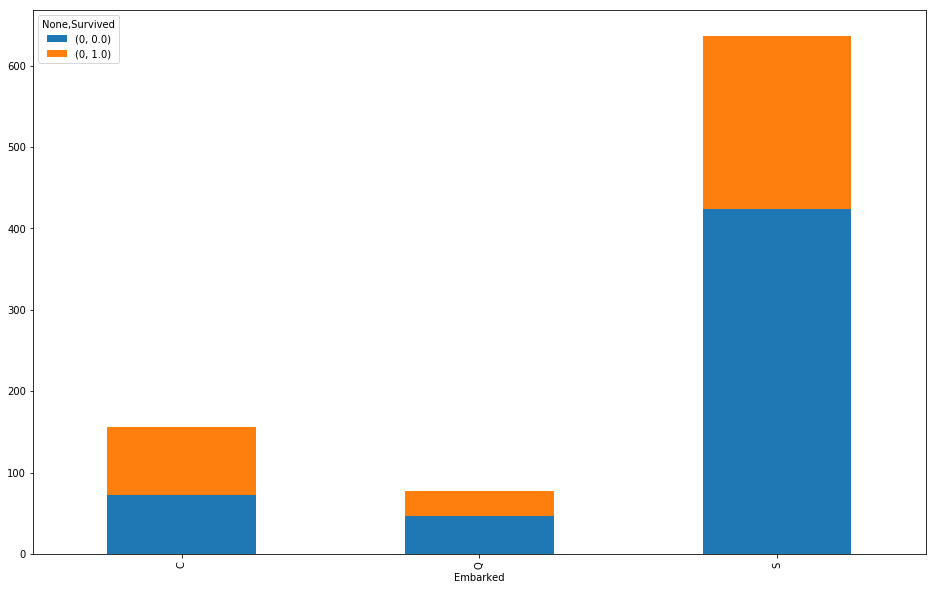

In [81]:
pivoted = df.groupby(['Embarked', 'Survived']).size().reset_index().pivot(index='Embarked', columns='Survived')
stackedplot = pivoted.plot.bar(stacked=True)

In [82]:
df = pd.get_dummies(df,columns=['Embarked'],prefix='Embarked')

In [83]:
df.head(10)

,Age,Fare,PassengerId,Pclass,Sex,Survived,dataset,Family,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,1,3,1,0.0,train,1,0,0,0,0,0,0,0,0,1,0,0,1
1,38.000000,71.2833,2,1,0,1.0,train,1,0,0,1,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,3,3,0,1.0,train,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.000000,53.1000,4,1,0,1.0,train,1,0,0,1,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,5,3,1,0.0,train,0,0,0,0,0,0,0,0,0,1,0,0,1
5,29.881138,8.4583,6,3,1,0.0,train,0,0,0,0,0,0,0,0,0,1,0,1,0
6,54.000000,51.8625,7,1,1,0.0,train,0,0,0,0,0,1,0,0,0,0,0,0,1
7,2.000000,21.0750,8,3,1,0.0,train,4,0,0,0,0,0,0,0,0,1,0,0,1
8,27.000000,11.1333,9,3,0,1.0,train,2,0,0,0,0,0,0,0,0,1,0,0,1
9,14.000000,30.0708,10,2,0,1.0,train,1,0,0,0,0,0,0,0,0,1,1,0,0


In [84]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [85]:
X = df[df.dataset == 'train'].drop(['PassengerId', 'dataset', 
    'Survived'],axis = 1)
y = df[df.dataset == 'train']['Survived']
X_test = df[df.dataset == 'test'].drop(['PassengerId', 'dataset', 'Survived'], axis=1)

In [86]:
X_train,X_validate,y_train,y_validate = train_test_split(
X,y,test_size = 0.2)

In [87]:
model = RandomForestClassifier(n_estimators=10000)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
model.score(X_validate,y_validate)

0.8571428571428571

In [89]:
X_test.isnull().sum() 

Age           0
Fare          1
Pclass        0
Sex           0
Family        0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Cabin_Z       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [90]:
X_test['Fare'] = X_test[['Fare']].applymap(lambda x: df.Fare.median() if pd.isnull(x) else x)

In [91]:
y_test = model.predict(X_test)
submission = pd.DataFrame(np.c_[df[df.dataset == 'test'].PassengerId, y_test.astype(int)], columns=['PassengerId','Survived'])
submission.to_csv('submission.csv', index=False)

In [92]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


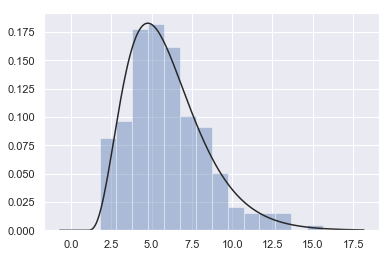

In [3]:
import numpy as np
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))#每次产生的随机数相同
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats, integrate
%matplotlib inline

sns.set(color_codes=True)
mean, cov = [0.5, 1], [(1, .5),(.5, 1)]#设置均值(一组参数)和协方差（两组参数）
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
print(df.head())
sns.jointplot(x="x", y="y", data=df)
